In [96]:
import pandas as pd
import numpy as np
import time
import random
from math import *
import operator
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [97]:
#Importing Data

In [98]:
df_train =  pd.read_csv(r"C:\Users\Rahul\Desktop\Capstone Project\Project_1\Project 1\train.csv")
df_test = pd.read_csv(r"C:\Users\Rahul\Desktop\Capstone Project\Project_1\Project 1\test.csv")

In [99]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [100]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [101]:
df_train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [102]:
df_test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [103]:
len(df_train)

27321

In [104]:
len(df_test)

11709

In [105]:
df_train.describe

<bound method NDFrame.describe of           UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0      267822      NaN       140        53       36      New York       NY   
1      246444      NaN       140       141       18       Indiana       IN   
2      245683      NaN       140        63       18       Indiana       IN   
3      279653      NaN       140       127       72   Puerto Rico       PR   
4      247218      NaN       140       161       20        Kansas       KS   
...       ...      ...       ...       ...      ...           ...      ...   
27316  279212      NaN       140        43       72   Puerto Rico       PR   
27317  277856      NaN       140        91       42  Pennsylvania       PA   
27318  233000      NaN       140        87        8      Colorado       CO   
27319  287425      NaN       140       439       48         Texas       TX   
27320  265371      NaN       140         3       32        Nevada       NV   

              city           

In [106]:
df_test.describe

<bound method NDFrame.describe of           UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
0      255504      NaN       140       163       26       Michigan       MI   
1      252676      NaN       140         1       23          Maine       ME   
2      276314      NaN       140        15       42   Pennsylvania       PA   
3      248614      NaN       140       231       21       Kentucky       KY   
4      286865      NaN       140       355       48          Texas       TX   
...       ...      ...       ...       ...      ...            ...      ...   
11704  238088      NaN       140       105       12        Florida       FL   
11705  242811      NaN       140        31       17       Illinois       IL   
11706  250127      NaN       140         9       25  Massachusetts       MA   
11707  241096      NaN       140        27       19           Iowa       IA   
11708  287763      NaN       140       453       48          Texas       TX   

                 

In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [109]:
#Taking UID as index for the data set

In [110]:
df_train.set_index(keys=['UID'],inplace=True)
df_test.set_index(keys=['UID'],inplace=True)

In [111]:
df_train.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [112]:
df_test.head(2)

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


In [113]:
missing_list_train = df_train.isnull().sum()*100/len(df_train)
missing_value_df_train = pd.DataFrame(missing_list_train, columns=['Percentage of Missing Values'])
missing_value_df_train.sort_values(by=['Percentage of Missing Values'],inplace=True, ascending=False)
missing_value_df_train[missing_value_df_train['Percentage of Missing Values']>0]

,Percentage of Missing Values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
hc_sample_weight,2.196113
hc_mortgage_mean,2.097288
hc_mortgage_stdev,2.097288
hc_mortgage_sample_weight,2.097288
hc_mortgage_samples,2.097288


In [114]:
missing_list_test=df_test.isnull().sum()*100/len(df_test)
missing_value_df_test=pd.DataFrame(missing_list_test, columns=['Percentage of Missing Value'])
missing_value_df_test.sort_values(by=['Percentage of Missing Value'],inplace=True, ascending=False)
missing_value_df_test[missing_value_df_test['Percentage of Missing Value']>0]

,Percentage of Missing Value
BLOCKID,100.000000
hc_samples,2.476727
hc_mean,2.476727
hc_median,2.476727
hc_stdev,2.476727
hc_sample_weight,2.476727
hc_mortgage_mean,2.288838
hc_mortgage_stdev,2.288838
hc_mortgage_sample_weight,2.288838
hc_mortgage_samples,2.288838


In [115]:
#In Train data set, 100% data of BLOCKID is missing.
#In test data set, 100% data of BLOCKID is missing.
#So, BLOCKID can be dropped from the data set.
#SUMLEVEL doest not have any predictive power and no variance. So, SUMLEVEL can be dropped.

In [116]:
df_train.drop(columns=['BLOCKID','SUMLEVEL'], inplace=True)

In [117]:
df_test.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)

In [118]:
missing_train_col=[]
for col in df_train.columns:
    if df_train[col].isna().sum() !=0:
        missing_train_col.append(col)
print(missing_train_col)
len(missing_train_col)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


58

In [119]:
missing_test_col=[]
for col in df_test.columns:
    if df_test[col].isna().sum()!=0:
        missing_test_col.append(col)
print(missing_test_col)        
len(missing_test_col)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


58

In [120]:
for col in df_train.columns:
    if col in (missing_train_col):
        df_train[col].replace(np.nan,df_train[col].mean(),inplace=True)

In [121]:
for col in df_test.columns:
    if col in (missing_test_col):
        df_test[col].replace(np.nan, df_train[col].mean(),inplace=True)

In [122]:
df_train.isna().sum().sum()

0

In [123]:
df_test.isna().sum().sum()

0

In [124]:
from pandasql import sqldf

In [125]:
from pandasql import sqldf

In [126]:
q1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_location_mort_pct=pysqldf(q1)

In [127]:
df_train_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [128]:
#Exploring the top 2500 locations where second mortgage is highest and above 10%. The data of top 2500 location is vizualised in Geo Map

In [129]:
import plotly.express as px
import plotly.graph_objects as go

In [130]:
fig = go.Figure(data=go.Scattergeo(
    lat=df_train_location_mort_pct['lat'],
    lon=df_train_location_mort_pct['lng']),
               )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

In [131]:
#Calucating the bad debt and vizualizing the same in Pie Chart

In [132]:
df_train['Bad_Debt'] = df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

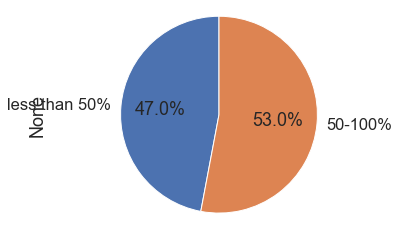

In [133]:
df_train['bins'] = pd.cut(df_train['Bad_Debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
df_train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')

plt.show()

In [134]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [135]:
df_train['city'].value_counts().sort_values(ascending=False)


Chicago          294
Brooklyn         282
Los Angeles      243
Houston          222
Philadelphia     165
                ... 
Port Republic      1
Lohn               1
Upsala             1
Belle Plaine       1
Bainville          1
Name: city, Length: 6916, dtype: int64

In [136]:
#choosing Chicago & Brooklyn as they are the top 2 in no. of values

In [137]:
cols=['second_mortgage','home_equity','debt','bad_debt']
df_box_chicago=df_train.loc[df_train['city']=='Chicago']
df_box_brooklyn=df_train.loc[df_train['city']=='Brooklyn']
df_box_city = pd.concat([df_box_chicago,df_box_brooklyn])
df_box_city.head()


,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad_Debt,bins
UID,,,,,,,,,,,,,,,,,,,,,
242859,31,17,Illinois,IL,Chicago,Chicago City,Village,tract,60636,773,...,25.39417,186.44001,799.0,0.60152,0.16021,0.05634,0.03697,0.09155,0.15547,50-100%
242616,31,17,Illinois,IL,Chicago,Cicero,Village,tract,60623,773,...,25.96493,484.58017,2039.0,0.27222,0.25113,0.07706,0.05893,0.17135,0.03571,less than 50%
242670,31,17,Illinois,IL,Chicago,Chicago City,Village,tract,60653,773,...,19.97031,202.60419,794.0,0.52166,0.32897,0.08151,0.04512,0.04512,0.17010,50-100%
242787,31,17,Illinois,IL,Chicago,Forest View,Village,tract,60632,773,...,19.97822,235.87179,948.0,0.47914,0.34227,0.05678,0.00000,0.13249,0.14692,50-100%
242388,31,17,Illinois,IL,Chicago,Chicago City,Village,tract,60610,773,...,17.46723,556.95347,2045.0,0.24054,0.32561,0.00832,0.00832,0.06358,0.13979,50-100%


In [138]:
#Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities. 

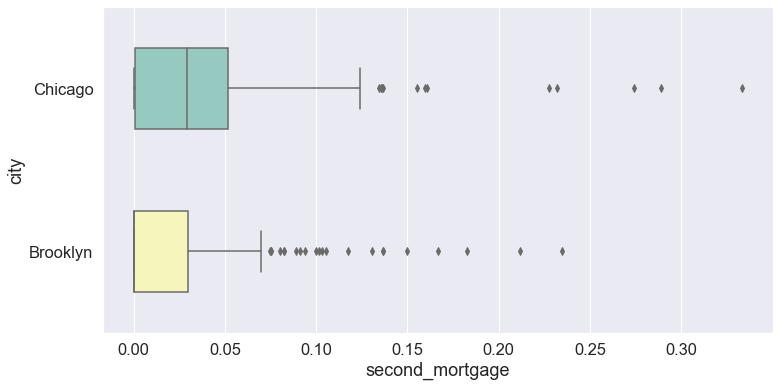

In [139]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_box_city,x='second_mortgage',y='city',width=0.5, palette='Set3')
plt.show()

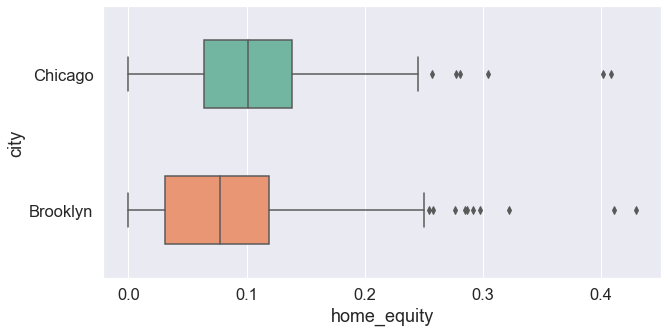

In [140]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x="home_equity",y='city', width=0.5,palette="Set2")
plt.show()

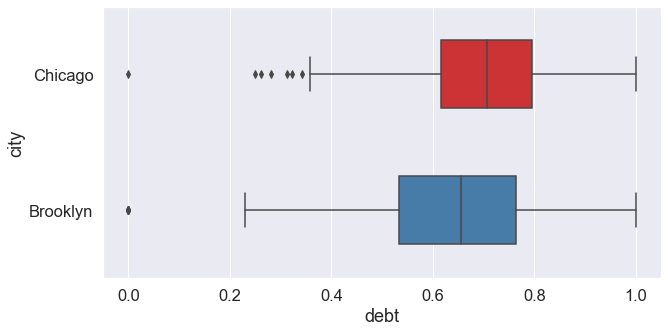

In [141]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt',y='city',width=0.5,palette='Set1')
plt.show()

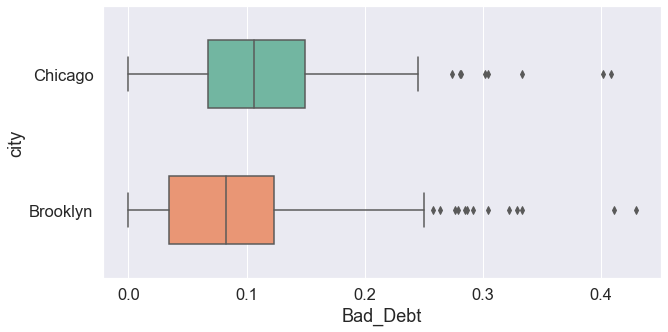

In [142]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='Bad_Debt',y='city',width=0.5,palette='Set2')
plt.show()

In [143]:
#collated income distribution chart for family income, house hold income and remaining income

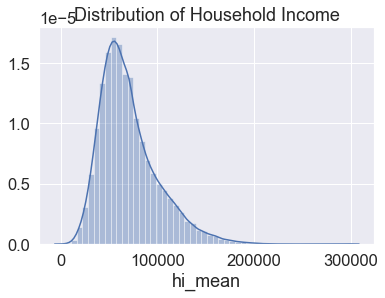

In [144]:
sns.distplot(df_train['hi_mean'])
plt.title('Distribution of Household Income')
plt.show()

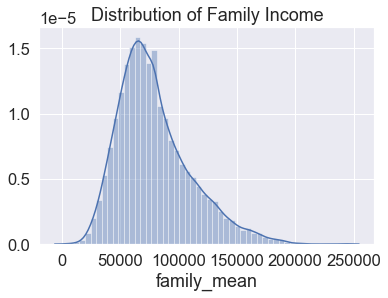

In [145]:
sns.distplot(df_train['family_mean'])
plt.title('Distribution of Family Income')
plt.show()

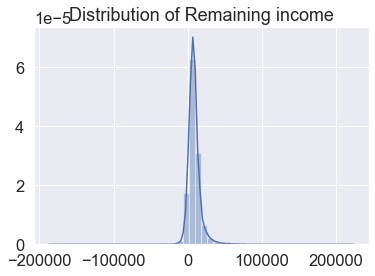

In [146]:
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title("Distribution of Remaining income")
plt.show()

In [147]:
#Performed EDA on age and Population density and vizualizing the same with appropritate vizualization

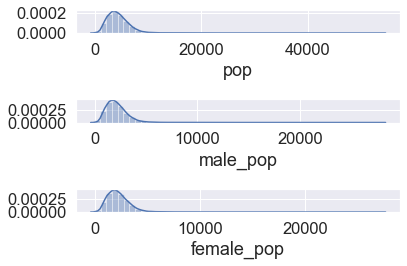

In [148]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

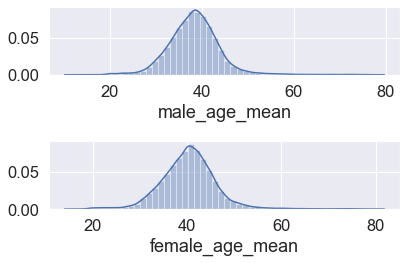

In [149]:
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

In [150]:
df_train['pop_density']=df_train['pop']/df_train['ALand']
df_test['pop_density']=df_test['pop']/df_test['ALand']

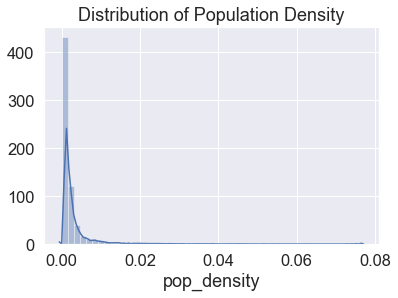

In [151]:
sns.distplot(df_train['pop_density'])
plt.title("Distribution of Population Density")
plt.show()

In [152]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

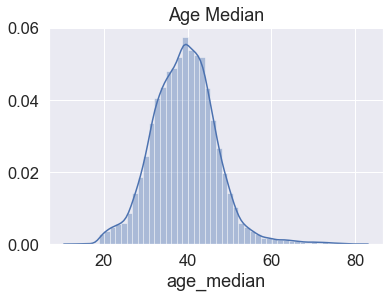

In [153]:
sns.distplot(df_train['age_median'])
plt.title('Age Median')
plt.show()

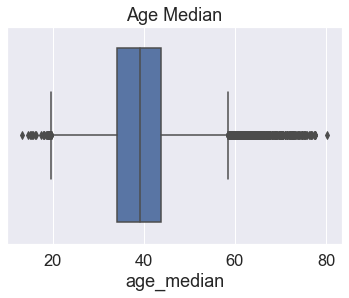

In [154]:
sns.boxplot(df_train['age_median'])
plt.title('Age Median')
plt.show()

In [155]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [156]:
#Bins for Population in 5 Category
#Very low, low, medium, high & Very high

In [157]:
df_train['pop_bins']=pd.cut(df_train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [158]:
print(df_train[['pop','pop_bins']])

          pop  pop_bins
UID                    
267822   5230  very low
246444   2633  very low
245683   6881  very low
279653   2700  very low
247218   5637  very low
...       ...       ...
279212   1847  very low
277856   4155  very low
233000   2829  very low
287425  11542       low
265371   3726  very low

[27321 rows x 2 columns]


In [159]:
df_train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [160]:
#married, separated and divorced population for above mentioned population brackets

In [161]:
df_train.groupby("pop_bins")[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [162]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

<Figure size 720x360 with 0 Axes>

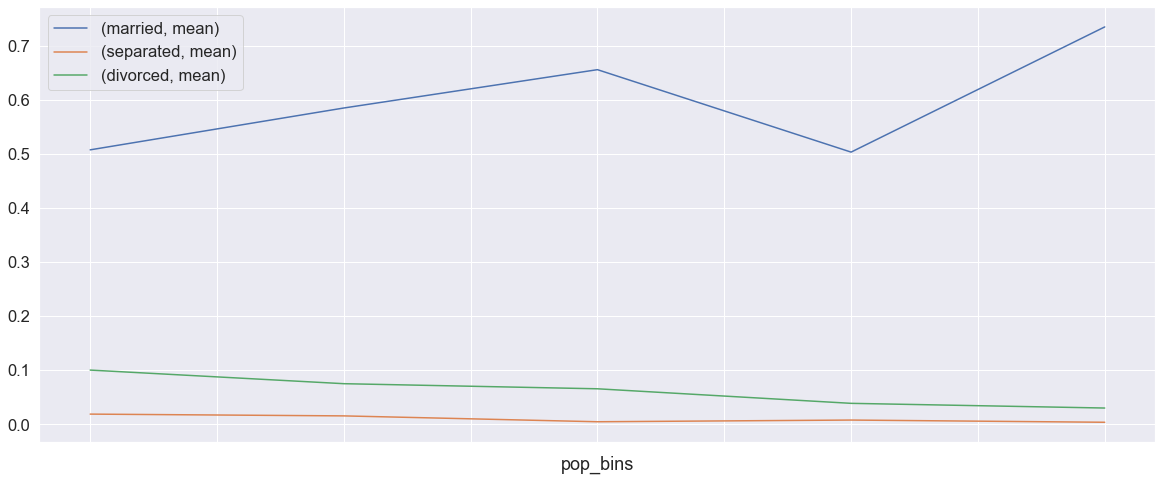

In [163]:
plt.figure(figsize=(10,5))
pop_bin_married=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

In [164]:
rent_state_mean=df_train.groupby('state')['rent_mean'].agg(["mean"])

In [165]:
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [166]:
income_state_mean=df_train.groupby('state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [167]:
rent_income_perc=(rent_state_mean['mean']/income_state_mean['mean'])*100
rent_income_perc.head()

state
Alabama       1.154713
Alaska        1.286963
Arizona       1.497041
Arkansas      1.113123
California    1.678314
Name: mean, dtype: float64

In [168]:
overall_perc=(sum(rent_state_mean['mean'])/sum(income_state_mean['mean']))*100
print(overall_perc)

1.2589116678835581


In [169]:
#correlation analysis for all the relevant variables by creating a heatmap

In [170]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [171]:
cor=df_train[['COUNTYID','STATEID','zip_code','type','pop','male_pop','female_pop','family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

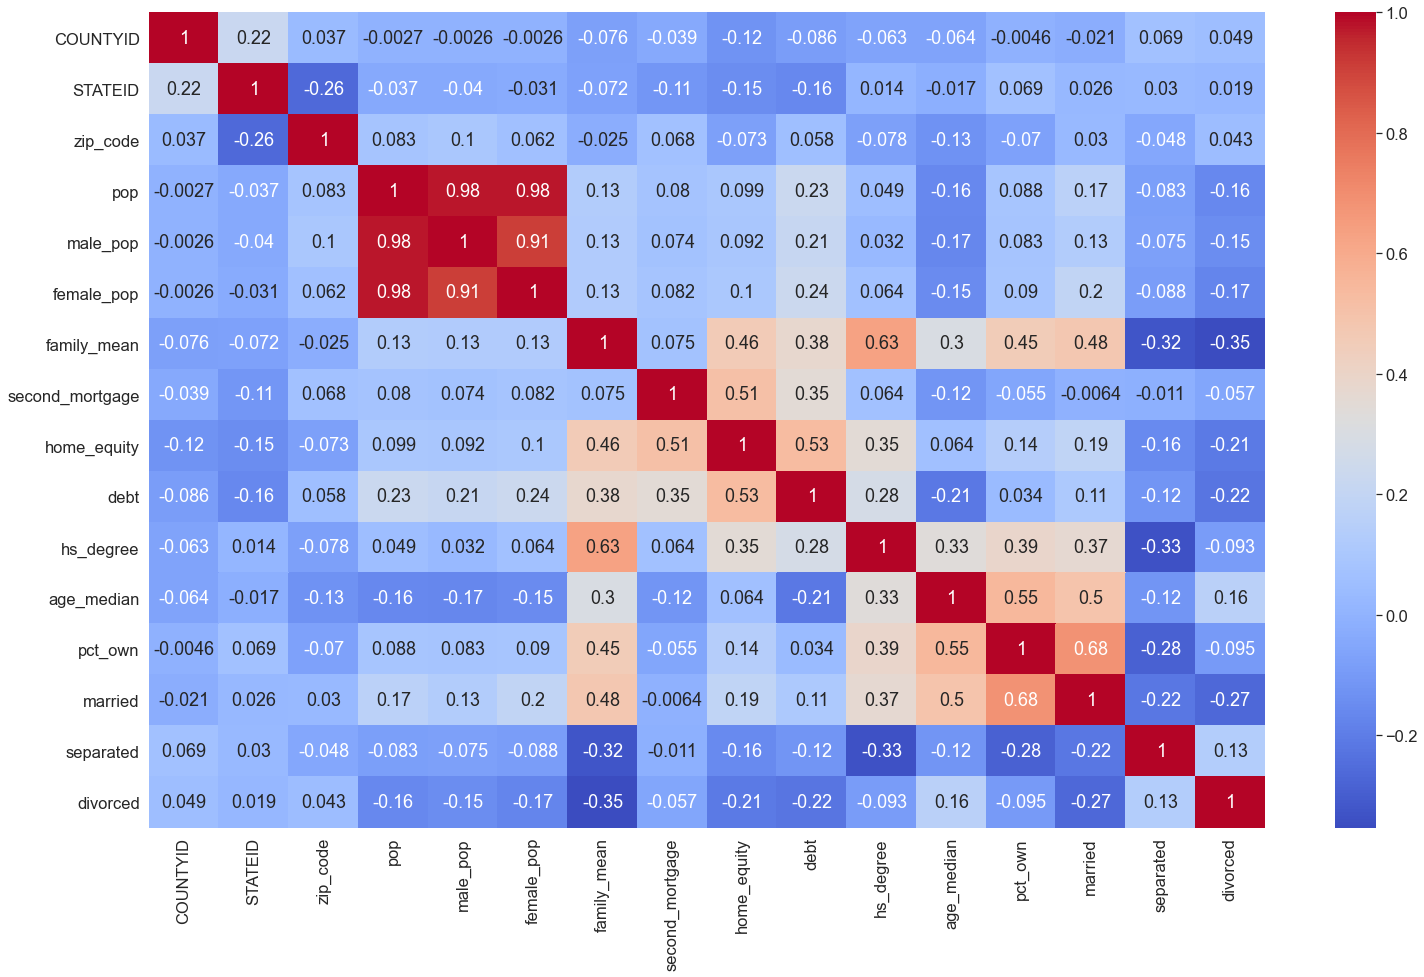

In [172]:
plt.figure(figsize=(25,15))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [173]:
#High positive correaltion is noticed between pop, male_pop and female_pop
#High positive correaltion is noticed between rent_mean,hi_mean, family_mean,hc_mean

In [174]:
#Decomposing the data in 5 factor for better and fast analysis.

In [175]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [176]:
fa = FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes(exclude=('object','category')))
fa.loadings_

array([[-1.12589165e-01,  1.95646476e-02, -2.39331099e-02,
        -6.27632651e-02,  4.23474795e-02],
       [-1.10186760e-01,  1.33506217e-02,  2.79651244e-02,
        -1.49825861e-01,  1.10838809e-01],
       [-8.28678627e-02,  5.16372377e-02, -1.36451870e-01,
        -4.98918638e-02, -1.04024838e-01],
       [ 1.80961175e-02,  1.92013759e-02,  5.81329774e-03,
         2.64842740e-02, -6.12442151e-03],
       [ 9.02324667e-02, -9.72544302e-02, -6.54601274e-02,
        -1.33145897e-01, -1.48594606e-01],
       [-1.07335704e-02, -4.12376817e-02,  1.45853484e-01,
         8.80433441e-03,  1.08227564e-01],
       [-4.28796954e-02, -2.09780212e-02,  3.66726849e-02,
        -9.45597372e-02,  5.91380540e-02],
       [-2.44242929e-03, -1.53245407e-02, -2.68300875e-03,
        -4.52473030e-02,  2.37240664e-02],
       [ 7.92164351e-02,  9.57453316e-01, -8.71151674e-02,
        -6.59924057e-03, -3.97273167e-02],
       [ 7.39808240e-02,  9.18750522e-01, -1.08834844e-01,
        -2.79371607e-02

In [177]:
df_train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [178]:
type_dict={'type':{'City':1,"Urban":2,'Town':3,'CDP':4,'Village':5,'Borough':6}}

In [179]:
df_train.replace(type_dict,inplace=True)

In [180]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [181]:
df_test.replace(type_dict,inplace=True
               )

In [182]:
df_test['type'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [183]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop','male_pop','female_pop','family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [184]:
x_train=df_train[feature_cols]
y_train=df_train['hc_mortgage_mean']

In [185]:
x_test=df_test[feature_cols]
y_test=df_test['hc_mortgage_mean']

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,accuracy_score

In [187]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [188]:
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)

LinearRegression()

In [189]:
y_pred=lin_reg.predict(x_test_scaled)

In [190]:

print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score of linear regression model 0.7350635458588295
Overall RMSE of linear regression model 322.9545374055789


In [191]:
state=df_train['STATEID'].unique()
state[0:5]

array([36, 18, 72, 20,  1], dtype=int64)

In [192]:

for i in [20,1,45]:
    print("State ID-",i)
    
    x_train_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    y_train_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    y_test_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    lin_reg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=lin_reg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.5753670564143863
Overall RMSE of linear regression model for state, 20 :- 319.89299199195904


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8096314803718438
Overall RMSE of linear regression model for state, 1 :- 308.50175922317356


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7880066436726422
Overall RMSE of linear regression model for state, 45 :- 226.0900375428626




In [193]:
residuals=y_test-y_pred
residuals

UID
255504    268.995074
252676    -67.120416
276314    199.126297
248614   -148.942853
286865     -4.153391
             ...    
238088    -69.107293
242811    -32.695001
250127   -127.008487
241096   -337.286932
287763    220.895611
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([6.000e+00, 3.000e+00, 2.700e+01, 7.390e+02, 7.803e+03, 2.761e+03,
        3.060e+02, 4.900e+01, 1.200e+01, 3.000e+00]),
 array([-2526.69415752, -1993.16496712, -1459.63577672,  -926.10658632,
         -392.57739593,   140.95179447,   674.48098487,  1208.01017527,
         1741.53936567,  2275.06855607,  2808.59774647]),
 <a list of 10 Patch objects>)

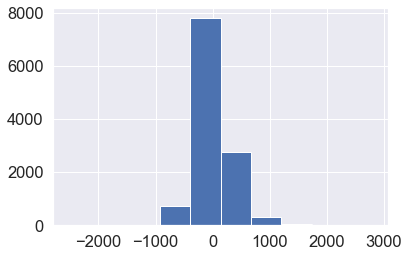

In [194]:
plt.hist(residuals)

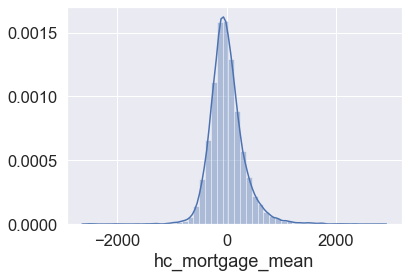

In [195]:
sns.distplot(residuals)

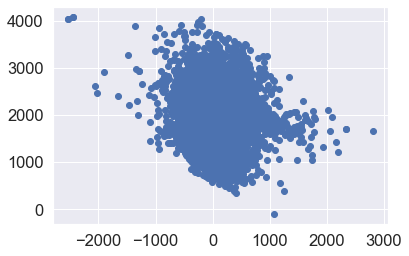

In [196]:
plt.scatter(residuals,y_pred)